In [57]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.lines as mlines
import itertools

%matplotlib notebook

In [58]:
##READ IN USER INPUTS
filename = str(input('The name of the folder?:   ') or 'example_binary') 
filename=str(filename)

The name of the folder?:   Nbody_2019-05-15-224656


In [59]:
##Read the simulation outputs
data=np.genfromtxt(filename+'/output.dat')
Etot=data[:,3]; t=data[:,0]


##Get the number of particles in the simulation
n_particles=int((len(data[0])-4.)/7.)

In [60]:
##Make the mass, position and velocity names for all the particles
numbers=np.arange(n_particles)+1
numbers=[str(i) for i in numbers]

mass_labels=['m']
pos_labels=['x','y','z']
vel_labels=['xv','yv','zv']
line_labels=['line']
dot_labels=['dot']

mass_names=map(''.join, itertools.product(numbers, mass_labels))
pos_names=map(''.join, itertools.product(numbers, pos_labels))
vel_names=map(''.join, itertools.product(numbers, vel_labels))

line_names=map(''.join, itertools.product(numbers, line_labels))
dot_names=map(''.join, itertools.product(numbers, dot_labels))

mass_names=[i[::-1] for i in mass_names]
pos_names=[i[::-1] for i in pos_names]
vel_names=[i[::-1] for i in vel_names]
print(pos_names)

line_names=[i[::-1] for i in line_names]
dot_names=[i[::-1] for i in dot_names]


##Apply values from the outputs to the names
for i in range(n_particles):
    mass_names[i]=data[0,4+7*i]   ##The initial mass of the particles
       
    for j in range(3):
        pos_names[3*i+j]=data[:,5+7*i+j]
        

['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3']


In [61]:
def init():
    ##initiate lines
    for line in lines:
        line.set_data([], [])
        
    ##initiate dots
    for dot in dots:
        dot.set_data([],[])
        
    return patches  #return everything that must be updated
        
        
def animate(i):    
    ##animate lines
    for j,line in enumerate(lines):
        line.set_data(pos_names[j*3][:i], pos_names[j*3+1][:i])

    #animate rectangles
    for j,dot in enumerate(dots):
        dot.set_data(pos_names[j*3][i], pos_names[j*3+1][i])        
    
    return patches  #return everything that must be updated

In [62]:
##Create animation object
def threebody():
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(pos_names[0]), interval=1, blit=False)

    return anim


<IPython.core.display.Javascript object>


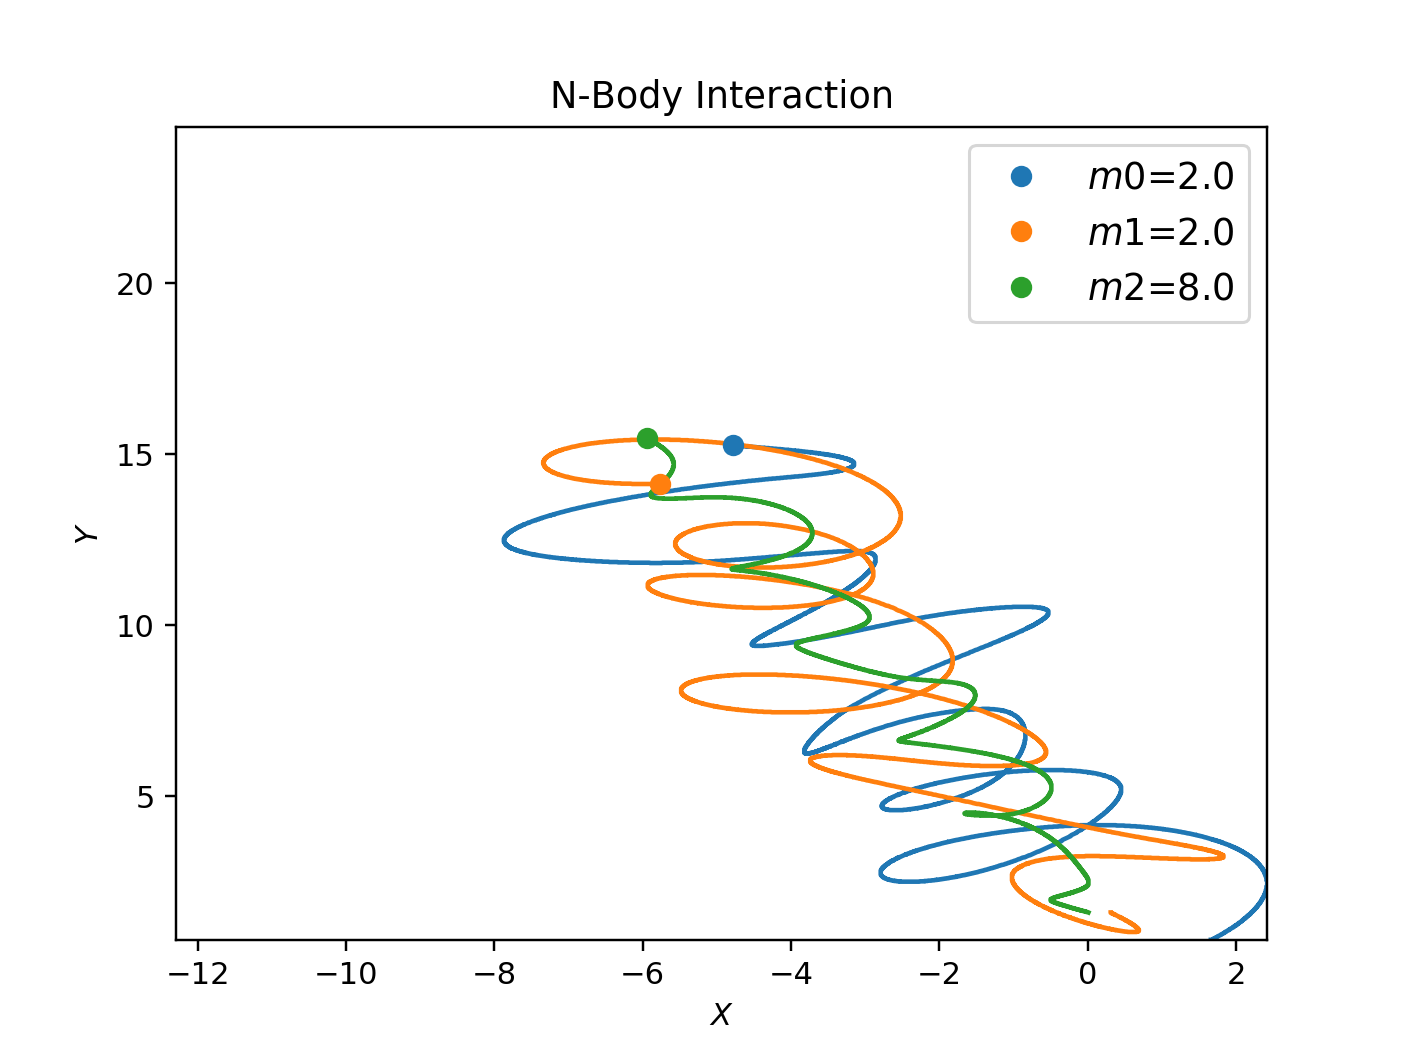

In [63]:
##First set up the figure, the axis, and the plot element we want to animate
fig=plt.figure()
ax=plt.gca()

lines = [ax.plot([], [], '-', lw=1.5)[0] for _ in range(n_particles)]  #lines to animate
ax.set_prop_cycle(None)
dots=[ax.plot([], [], 'o', label=r'$m$'+str(_)+'='+str(mass_names[_]))[0] for _ in range(n_particles)]  #dots to animate

patches = lines + dots #things to animate

xlimits=[]; ylimits=[]
for k in range(n_particles):
    xlimits.append(pos_names[k*3])
    ylimits.append(pos_names[k*3+1])
    
xmin=np.min(xlimits); xmax=np.max(xlimits)
ymin=np.min(ylimits); ymax=np.max(ylimits)

ax.set_xlabel(r'$X$')
ax.set_ylabel(r'$Y$')
ax.set_title('N-Body Interaction')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.legend(loc='best', prop={'size': 12}, frameon=True, numpoints=1)


##Plot the animation of N-body interaction
threebody()

<IPython.core.display.Javascript object>


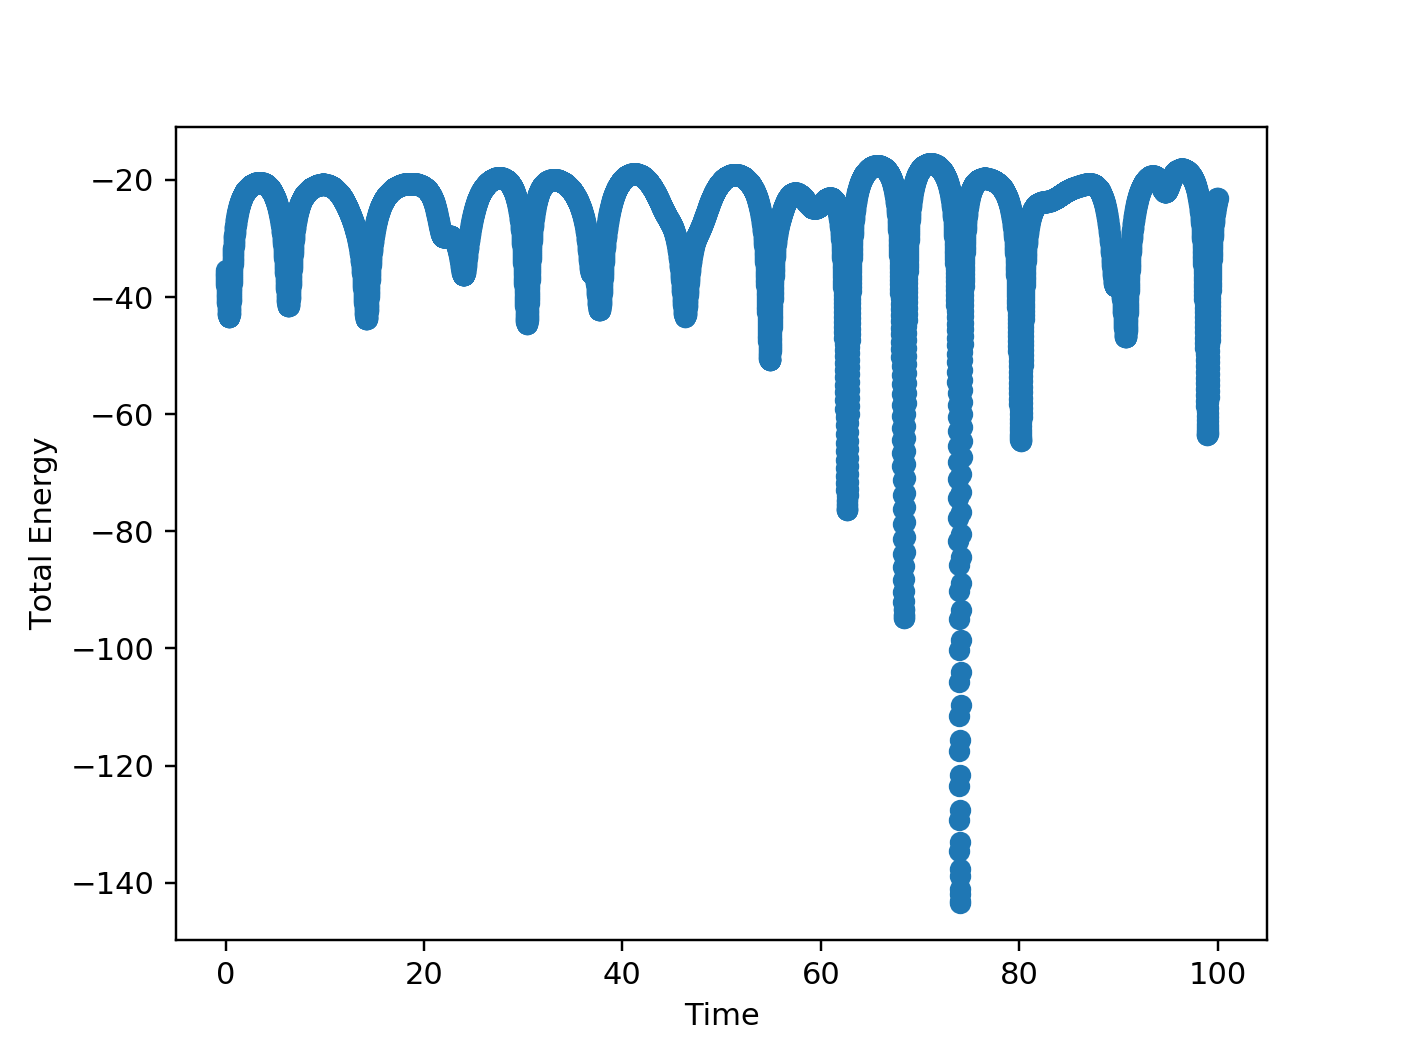

Text(0, 0.5, 'Total Energy')

In [64]:
fig=plt.figure()
ax=plt.gca()
ax.scatter(t, Etot)
ax.set_xlabel('Time')
ax.set_ylabel('Total Energy')